In [ ]:
import torch 
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
project_folder = '/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole'
os.chdir(project_folder)

In [ ]:
!pip install recbole

     |████████████████████████████████| 2.0MB 7.6MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 645kB 34.5MB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!git clone https://github.com/RUCAIBox/RecDatasets

Cloning into 'RecDatasets'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 1028 (delta 86), reused 116 (delta 47), pack-reused 837
Receiving objects: 100% (1028/1028), 276.52 KiB | 1.47 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [ ]:
%cd RecDatasets

/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/RecDatasets


In [ ]:
%cd conversion_tools

/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/RecDatasets/conversion_tools


In [ ]:
!pip install -r requirements.txt

In [ ]:
# Download the Yelp Dataset into the 'conversion_tools/' directory.

# !mkdir yelp_dataset

!tar -zxvf yelp_dataset.tar -C ./yelp_dataset

Dataset_User_Agreement.pdf
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.json
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json


In [ ]:
!ls

add_knowledge.py  requirements.txt  src    yelp_dataset
README.md	  run.py	    usage  yelp_dataset.tar


In [ ]:
!python run.py --dataset yelp --input_path yelp_dataset --output_path output_data/yelp --convert_inter --convert_item --convert_user

100% 8635403/8635403 [07:17<00:00, 19754.41it/s]
100% 160585/160585 [01:03<00:00, 2543.95it/s]
100% 2189457/2189457 [02:21<00:00, 15457.15it/s]


# Default Recbole NeuMF Model

In [ ]:
!git clone https://github.com/RUCAIBox/RecBole.git

Cloning into 'RecBole'...
remote: Enumerating objects: 483, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (353/353), done.
remote: Total 14681 (delta 264), reused 238 (delta 128), pack-reused 14198
Receiving objects: 100% (14681/14681), 14.56 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (9562/9562), done.
Checking out files: 100% (575/575), done.


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole')

12 Apr 07:35    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = False
data_path = /usr/local/lib/python3.7/dist-packages/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 4
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = True
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING_FIELD = rating
TIME_FIELD = timestamp
s

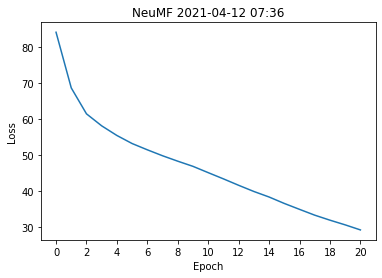

12 Apr 07:36    INFO  Loading model structure and parameters from saved/NeuMF-Apr-12-2021_07-35-28.pth
Evaluate   : 100%|██████████| 472/472 [00:00<00:00, 821.56it/s]
12 Apr 07:36    INFO  best valid : {'recall@10': 0.2257, 'mrr@10': 0.3944, 'ndcg@10': 0.2389, 'hit@10': 0.7646, 'precision@10': 0.1651}
12 Apr 07:36    INFO  test result: {'recall@10': 0.2491, 'mrr@10': 0.485, 'ndcg@10': 0.2929, 'hit@10': 0.7964, 'precision@10': 0.2014}


{'best_valid_result': {'hit@10': 0.7646,
  'mrr@10': 0.3944,
  'ndcg@10': 0.2389,
  'precision@10': 0.1651,
  'recall@10': 0.2257},
 'best_valid_score': 0.3944,
 'test_result': {'hit@10': 0.7964,
  'mrr@10': 0.485,
  'ndcg@10': 0.2929,
  'precision@10': 0.2014,
  'recall@10': 0.2491},
 'valid_score_bigger': True}

<Figure size 432x288 with 0 Axes>

In [ ]:
from recbole.quick_start.quick_start import run_recbole

run_recbole(model='NeuMF', dataset='ml-100k', config_dict={"reproducibility" : False, "training_neg_sample_num": 4, "draw_loss_pic": True})

In [ ]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/RecBole/recbole',
 '/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/RecBole',
 '/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/RecBole/recbole']

In [ ]:
from recbole.quick_start.quick_start import run_recbole

run_recbole(model='NeuMF', dataset='yelp', config_dict={"reproducibility" : False, "training_neg_sample_num": 4, 'load_col': {'inter': ['user_id', 'business_id']}, 'ITEM_ID_FIELD': 'business_id', 'RATING_FIELD': 'stars', 'TIME_FIELD': None})

07 Apr 20:10    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = False
data_path = dataset/yelp
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 4
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = False
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = business_id
RATING_FIELD = stars
TIME_FIELD = None
seq_len = None
LABEL_FIELD = label
threshold = None
NEG_PREFIX = neg_


KeyboardInterrupt: ignored

## No pretrained

In [ ]:
from recbole.quick_start.quick_start import run_recbole

run_recbole(model='NeuMF', dataset='ml-100k', config_dict={"reproducibility" : False, "training_neg_sample_num": 4, 'training_neg_sample_distribution':'popularity'})

07 Apr 16:21    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = False
data_path = /usr/local/lib/python3.7/dist-packages/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 4
training_neg_sample_distribution = popularity
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = False
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING_FIELD = rating
TIME_FIELD = timesta

{'best_valid_result': {'hit@10': 0.6946,
  'mrr@10': 0.3412,
  'ndcg@10': 0.1942,
  'precision@10': 0.1316,
  'recall@10': 0.1783},
 'best_valid_score': 0.3412,
 'test_result': {'hit@10': 0.7423,
  'mrr@10': 0.4193,
  'ndcg@10': 0.2387,
  'precision@10': 0.1593,
  'recall@10': 0.2084},
 'valid_score_bigger': True}

In [ ]:
from recbole.quick_start.quick_start import run_recbole

run_recbole(model='BPR', dataset='ml-100k', config_dict={"reproducibility" : False, "training_neg_sample_num": 4})

07 Apr 15:21    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = False
data_path = /usr/local/lib/python3.7/dist-packages/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 4
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = False
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING_FIELD = rating
TIME_FIELD = timestamp


{'best_valid_result': {'hit@10': 0.7519,
  'mrr@10': 0.3882,
  'ndcg@10': 0.2285,
  'precision@10': 0.1567,
  'recall@10': 0.2127},
 'best_valid_score': 0.3882,
 'test_result': {'hit@10': 0.7837,
  'mrr@10': 0.4736,
  'ndcg@10': 0.283,
  'precision@10': 0.1917,
  'recall@10': 0.2434},
 'valid_score_bigger': True}

# Pretrained

In [ ]:
from recbole.quick_start.quick_start import run_recbole

run_recbole(model='NeuMF', dataset='ml-100k', config_dict=config_dict_neumf)

24 Mar 08:12    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /usr/local/lib/python3.7/dist-packages/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 1
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = False
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING_FIELD = rating
TIME_FIELD = timestamp
s

{'best_valid_result': {'hit@10': 0.7285,
  'mrr@10': 0.3699,
  'ndcg@10': 0.2214,
  'precision@10': 0.1552,
  'recall@10': 0.2047},
 'best_valid_score': 0.3699,
 'test_result': {'hit@10': 0.7762,
  'mrr@10': 0.4565,
  'ndcg@10': 0.2719,
  'precision@10': 0.1862,
  'recall@10': 0.2334},
 'valid_score_bigger': True}

In [ ]:
torch.load('/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/mlp_pretrained/mlp_pretrained.pth')

In [ ]:
from recbole.quick_start import run_recbole

run_recbole(model='ConvNCF', dataset='ml-100k')

29 Mar 16:41    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /usr/local/lib/python3.7/dist-packages/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 1
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = False
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING_FIELD = rating
TIME_FIELD = timestamp
s

{'best_valid_result': {'hit@10': 0.4931,
  'mrr@10': 0.217,
  'ndcg@10': 0.1081,
  'precision@10': 0.0813,
  'recall@10': 0.0945},
 'best_valid_score': 0.217,
 'test_result': {'hit@10': 0.5186,
  'mrr@10': 0.2429,
  'ndcg@10': 0.1277,
  'precision@10': 0.0957,
  'recall@10': 0.1051},
 'valid_score_bigger': True}

# Configuration for original NeuMF

In [ ]:
config_dict_neumf = {
  "mf_embedding_size": 64,
  "mlp_embedding_size": 64,
  "mlp_hidden_size": [128,64],
  "dropout_prob": 0.1,
  "mf_train": False,
  "mlp_train": True,
  "training_neg_sample_num": 4,
  "use_pretrain": False,
  "mf_pretrain_path": "/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/mf_pretrained/mf_pretrained.pth",
  "mlp_pretrain_path": "/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/mlp_pretrained/mlp_pretrained.pth",
  "model": "NeuMF",
  "reproducibility": False,
  "draw_loss_pic": True,
}

In [ ]:
torch.save(model, "/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/mf_pretrained/mf_pretrained.pth")

# NeuMf Pointwise

In [ ]:
import torch
import torch.nn as nn
from torch.nn.init import normal_

from recbole.model.abstract_recommender import GeneralRecommender
from recbole.model.layers import MLPLayers
from recbole.utils import InputType


class NeuMF(GeneralRecommender):
    r"""NeuMF is an neural network enhanced matrix factorization model.
    It replace the dot product to mlp for a more precise user-item interaction.
    Note:
        Our implementation only contains a rough pretraining function.
    """
    input_type = InputType.POINTWISE

    def __init__(self, config, dataset):
        super(NeuMF, self).__init__(config, dataset)

        # load dataset info
        self.LABEL = config['LABEL_FIELD']

        # load parameters info
        self.mf_embedding_size = config['mf_embedding_size']
        self.mlp_embedding_size = config['mlp_embedding_size']
        self.mlp_hidden_size = config['mlp_hidden_size']
        self.dropout_prob = config['dropout_prob']
        self.mf_train = config['mf_train']
        self.mlp_train = config['mlp_train']
        self.use_pretrain = config['use_pretrain']
        self.mf_pretrain_path = config['mf_pretrain_path']
        self.mlp_pretrain_path = config['mlp_pretrain_path']

        # define layers and loss
        self.user_mf_embedding = nn.Embedding(self.n_users, self.mf_embedding_size)
        self.item_mf_embedding = nn.Embedding(self.n_items, self.mf_embedding_size)
        self.user_mlp_embedding = nn.Embedding(self.n_users, self.mlp_embedding_size)
        self.item_mlp_embedding = nn.Embedding(self.n_items, self.mlp_embedding_size)
        self.mlp_layers = MLPLayers([2 * self.mlp_embedding_size] + self.mlp_hidden_size, self.dropout_prob)
        self.mlp_layers.logger = None  # remove logger to use torch.save()
        if self.mf_train and self.mlp_train:
            self.predict_layer = nn.Linear(self.mf_embedding_size + self.mlp_hidden_size[-1], 1)
        elif self.mf_train:
            self.predict_layer = nn.Linear(self.mf_embedding_size, 1)
        elif self.mlp_train:
            self.predict_layer = nn.Linear(self.mlp_hidden_size[-1], 1)
        self.sigmoid = nn.Sigmoid()
        self.loss = nn.BCELoss()

        # parameters initialization
        if self.use_pretrain:
            self.load_pretrain()
        else:
            self.apply(self._init_weights)

    def load_pretrain(self):
        r"""A simple implementation of loading pretrained parameters.
        """
        print("------------------ Loading Pretrain -------------------")
        mf = torch.load(self.mf_pretrain_path)
        mlp = torch.load(self.mlp_pretrain_path)
        self.user_mf_embedding.weight.data.copy_(mf.user_mf_embedding.weight)
        self.item_mf_embedding.weight.data.copy_(mf.item_mf_embedding.weight)
        self.user_mlp_embedding.weight.data.copy_(mlp.user_mlp_embedding.weight)
        self.item_mlp_embedding.weight.data.copy_(mlp.item_mlp_embedding.weight)

        for (m1, m2) in zip(self.mlp_layers.mlp_layers, mlp.mlp_layers.mlp_layers):
            if isinstance(m1, nn.Linear) and isinstance(m2, nn.Linear):
                m1.weight.data.copy_(m2.weight)
                m1.bias.data.copy_(m2.bias)

        predict_weight = torch.cat([mf.predict_layer.weight, mlp.predict_layer.weight], dim=1)
        predict_bias = mf.predict_layer.bias + mlp.predict_layer.bias

        self.predict_layer.weight.data.copy_(0.5 * predict_weight)
        self.predict_layer.weight.data.copy_(0.5 * predict_bias)

    def _init_weights(self, module):
        if isinstance(module, nn.Embedding):
            normal_(module.weight.data, mean=0.0, std=0.01)

    def forward(self, user, item):
        user_mf_e = self.user_mf_embedding(user)
        item_mf_e = self.item_mf_embedding(item)
        user_mlp_e = self.user_mlp_embedding(user)
        item_mlp_e = self.item_mlp_embedding(item)
        if self.mf_train:
            mf_output = torch.mul(user_mf_e, item_mf_e)  # [batch_size, embedding_size]
        if self.mlp_train:
            mlp_output = self.mlp_layers(torch.cat((user_mlp_e, item_mlp_e), -1))  # [batch_size, layers[-1]]
        if self.mf_train and self.mlp_train:
            output = self.sigmoid(self.predict_layer(torch.cat((mf_output, mlp_output), -1)))
        elif self.mf_train:
            output = self.sigmoid(self.predict_layer(mf_output))
        elif self.mlp_train:
            output = self.sigmoid(self.predict_layer(mlp_output))
        else:
            raise RuntimeError('mf_train and mlp_train can not be False at the same time')
        return output.squeeze()

    def calculate_loss(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        label = interaction[self.LABEL]

        output = self.forward(user, item)
        return self.loss(output, label)

    def predict(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        return self.forward(user, item)

    def dump_parameters(self):
        r"""A simple implementation of dumping model parameters for pretrain.
        """
        print("DUMPING PARAMETERS!")
        if self.mf_train and not self.mlp_train:
            save_path = self.mf_pretrain_path
            torch.save(self, save_path)
        elif self.mlp_train and not self.mf_train:
            save_path = self.mlp_pretrain_path
            torch.save(self, save_path)

# Configuration for Experimental Pairwise NeuMF

In [ ]:
config_dict_neumf_pairwise = {
  "mf_embedding_size": 64,
  "mlp_embedding_size": 64,
  "mlp_hidden_size": [128,64],
  "dropout_prob": 0.1,
  "mf_train": True,
  "mlp_train": True,
  
  "use_pretrain": False,
  "mf_pretrain_path": "./mf_pretrained/mf_pretrained.pth",
  "mlp_pretrained_path": "./mlp_pretrained/mlp_pretrained.pth",
  "reg_weights": [0.1, 0.1]
}

# NeuMf Pairwise Experiment

In [ ]:
import torch
import torch.nn as nn
from torch.nn.init import normal_

from recbole.model.abstract_recommender import GeneralRecommender
from recbole.model.layers import MLPLayers
from recbole.utils import InputType

class ConvNCFBPRLoss(nn.Module):
    """ ConvNCFBPRLoss, based on Bayesian Personalized Ranking,
    
    Shape:
        - Pos_score: (N)
        - Neg_score: (N), same shape as the Pos_score
        - Output: scalar.
    Examples::
        >>> loss = ConvNCFBPRLoss()
        >>> pos_score = torch.randn(3, requires_grad=True)
        >>> neg_score = torch.randn(3, requires_grad=True)
        >>> output = loss(pos_score, neg_score)
        >>> output.backward()
    """

    def __init__(self):
        super(ConvNCFBPRLoss, self).__init__()

    def forward(self, pos_score, neg_score):
        distance = pos_score - neg_score
        loss = torch.sum(torch.log((1 + torch.exp(-distance))))
        return loss

class NeuMFPairWise(GeneralRecommender):
    r"""NeuMF is an neural network enhanced matrix factorization model.
    It replace the dot product to mlp for a more precise user-item interaction.
    Note:
        Our implementation only contains a rough pretraining function.
    """
    input_type = InputType.PAIRWISE

    def __init__(self, config, dataset):
        super(NeuMFPairWise, self).__init__(config, dataset)

        # load dataset info
        self.LABEL = config['LABEL_FIELD']

        # load parameters info
        self.mf_embedding_size = config['mf_embedding_size']
        self.mlp_embedding_size = config['mlp_embedding_size']
        self.mlp_hidden_size = config['mlp_hidden_size']
        self.dropout_prob = config['dropout_prob']
        self.mf_train = config['mf_train']
        self.mlp_train = config['mlp_train']
        self.use_pretrain = config['use_pretrain']
        self.mf_pretrain_path = config['mf_pretrain_path']
        self.mlp_pretrain_path = config['mlp_pretrain_path']
        self.regs = config['reg_weights']

        # define layers and loss
        self.user_mf_embedding = nn.Embedding(self.n_users, self.mf_embedding_size)
        self.item_mf_embedding = nn.Embedding(self.n_items, self.mf_embedding_size)
        self.user_mlp_embedding = nn.Embedding(self.n_users, self.mlp_embedding_size)
        self.item_mlp_embedding = nn.Embedding(self.n_items, self.mlp_embedding_size)
        self.mlp_layers = MLPLayers([2 * self.mlp_embedding_size] + self.mlp_hidden_size, self.dropout_prob)
        self.mlp_layers.logger = None  # remove logger to use torch.save()
        if self.mf_train and self.mlp_train:
            self.predict_layer = nn.Linear(self.mf_embedding_size + self.mlp_hidden_size[-1], 1)
        elif self.mf_train:
            self.predict_layer = nn.Linear(self.mf_embedding_size, 1)
        elif self.mlp_train:
            self.predict_layer = nn.Linear(self.mlp_hidden_size[-1], 1)
        self.sigmoid = nn.Sigmoid()
        self.loss = ConvNCFBPRLoss()

        # parameters initialization
        if self.use_pretrain:
            self.load_pretrain()
        else:
            self.apply(self._init_weights)

    def load_pretrain(self):
        r"""A simple implementation of loading pretrained parameters.
        """
        mf = torch.load(self.mf_pretrain_path)
        mlp = torch.load(self.mlp_pretrain_path)
        self.user_mf_embedding.weight.data.copy_(mf.user_mf_embedding.weight)
        self.item_mf_embedding.weight.data.copy_(mf.item_mf_embedding.weight)
        self.user_mlp_embedding.weight.data.copy_(mlp.user_mlp_embedding.weight)
        self.item_mlp_embedding.weight.data.copy_(mlp.item_mlp_embedding.weight)

        for (m1, m2) in zip(self.mlp_layers.mlp_layers, mlp.mlp_layers.mlp_layers):
            if isinstance(m1, nn.Linear) and isinstance(m2, nn.Linear):
                m1.weight.data.copy_(m2.weight)
                m1.bias.data.copy_(m2.bias)

        predict_weight = torch.cat([mf.predict_layer.weight, mlp.predict_layer.weight], dim=1)
        predict_bias = mf.predict_layer.bias + mlp.predict_layer.bias

        self.predict_layer.weight.data.copy_(0.5 * predict_weight)
        self.predict_layer.weight.data.copy_(0.5 * predict_bias)

    def _init_weights(self, module):
        if isinstance(module, nn.Embedding):
            normal_(module.weight.data, mean=0.0, std=0.01)

    def forward(self, user, item):
        user_mf_e = self.user_mf_embedding(user)
        item_mf_e = self.item_mf_embedding(item)
        user_mlp_e = self.user_mlp_embedding(user)
        item_mlp_e = self.item_mlp_embedding(item)
        if self.mf_train:
            mf_output = torch.mul(user_mf_e, item_mf_e)  # [batch_size, embedding_size]
        if self.mlp_train:
            mlp_output = self.mlp_layers(torch.cat((user_mlp_e, item_mlp_e), -1))  # [batch_size, layers[-1]]
        if self.mf_train and self.mlp_train:
            output = self.sigmoid(self.predict_layer(torch.cat((mf_output, mlp_output), -1)))
        elif self.mf_train:
            output = self.sigmoid(self.predict_layer(mf_output))
        elif self.mlp_train:
            output = self.sigmoid(self.predict_layer(mlp_output))
        else:
            raise RuntimeError('mf_train and mlp_train can not be False at the same time')
        return output.squeeze()

    def reg_loss(self):
        r"""Calculate the L2 normalization loss of model parameters.
        Including embedding matrices and weight matrices of model.
        Returns:
            loss(torch.FloatTensor): The L2 Loss tensor. shape of [1,]
        """
        reg_1, reg_2 = self.regs[:2]
        loss_1 = reg_1 * self.user_mf_embedding.weight.norm(2)
        loss_2 = reg_1 * self.item_mf_embedding.weight.norm(2)
        loss_3 = 0
        for name, parm in self.mlp_layers.named_parameters():
            if name.endswith('weight'):
                loss_3 = loss_3 + reg_2 * parm.norm(2)
        for name, parm in self.predict_layer.named_parameters():
            if name.endswith('weight'):
                loss_3 = loss_3 + reg_2 * parm.norm(2)
        return loss_1 + loss_2 + loss_3

    def calculate_loss(self, interaction):
        user = interaction[self.USER_ID]
        pos_item = interaction[self.ITEM_ID]
        neg_item = interaction[self.NEG_ITEM_ID]

        pos_item_score = self.forward(user, pos_item)
        neg_item_score = self.forward(user, neg_item)

        loss = self.loss(pos_item_score, neg_item_score)
        opt_loss = loss + self.reg_loss()

        return opt_loss

    def predict(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        return self.forward(user, item)

# Default convNCF config from Recbole

In [ ]:
config_dict_convNCF = {
    "embedding_size": 64,
    "cnn_channels": [1,32,32,32,32],
    "cnn_kernels": [4, 4, 2, 2],
    "cnn_strides": [4, 4, 2, 2],
    "dropout_prob": 0.2,
    "reg_weights": [0.2, 0.2]
}

# Default ConvNCF model from Recbole

In [ ]:
from recbole.quick_start.quick_start import run_recbole

run_recbole(model='NeuMF', dataset='ml-100k')

07 Apr 20:45    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /content/gdrive/My Drive/CS6101 Project Group/Experiments with RecBole/RecBole/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 1
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = False
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING

{'best_valid_result': {'hit@10': 0.7359,
  'mrr@10': 0.371,
  'ndcg@10': 0.2232,
  'precision@10': 0.1558,
  'recall@10': 0.2113},
 'best_valid_score': 0.371,
 'test_result': {'hit@10': 0.7635,
  'mrr@10': 0.46,
  'ndcg@10': 0.2751,
  'precision@10': 0.1889,
  'recall@10': 0.2335},
 'valid_score_bigger': True}

# ConvNCF

In [ ]:
import torch
import torch.nn as nn

from recbole.model.abstract_recommender import GeneralRecommender
from recbole.model.layers import MLPLayers, CNNLayers
from recbole.utils import InputType

class ConvNCF(GeneralRecommender):
    r"""ConvNCF is a a new neural network framework for collaborative filtering based on NCF.
    It uses an outer product operation above the embedding layer, 
    which results in a semantic-rich interaction map that encodes pairwise correlations between embedding dimensions.
    We carefully design the data interface and use sparse tensor to train and test efficiently.
    We implement the model following the original author with a pairwise training mode.
    """
    input_type = InputType.POINTWISE

    def __init__(self, config, dataset):
        super(ConvNCF, self).__init__(config, dataset)

        # load dataset info
        self.LABEL = config['LABEL_FIELD']

        # load parameters info
        self.embedding_size = config['embedding_size']
        self.cnn_channels = config['cnn_channels']
        self.cnn_kernels = config['cnn_kernels']
        self.cnn_strides = config['cnn_strides']
        self.dropout_prob = config['dropout_prob']
        self.regs = config['reg_weights']

        # define layers and loss
        self.user_embedding = nn.Embedding(self.n_users, self.embedding_size)
        self.item_embedding = nn.Embedding(self.n_items, self.embedding_size)
        self.cnn_layers = CNNLayers(self.cnn_channels, self.cnn_kernels, self.cnn_strides, activation='relu')
        self.predict_layers = MLPLayers([self.cnn_channels[-1], 1], self.dropout_prob, activation='none')
        self.sigmoid = nn.Sigmoid()
        self.loss = nn.BCELoss()

    def forward(self, user, item):
        user_e = self.user_embedding(user)
        item_e = self.item_embedding(item)

        interaction_map = torch.bmm(user_e.unsqueeze(2), item_e.unsqueeze(1))
        interaction_map = interaction_map.unsqueeze(1)

        cnn_output = self.cnn_layers(interaction_map)
        cnn_output = cnn_output.sum(axis=(2, 3))

        prediction = self.predict_layers(cnn_output)
        prediction = prediction.squeeze()

        return prediction

    def calculate_loss(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        label = interaction[self.LABEL]

        output = self.forward(user, item)
        return self.loss(output, label)

    def predict(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        return self.forward(user, item)

# NeuMF with Interaction Map and CNN

In [ ]:
config_dict_cnn_neumf = {
  "mf_embedding_size": 64,
  "mlp_embedding_size": 64,
  "cnn_embedding_size": 64,
  "mlp_hidden_size": [64,64],
  "mf_train": True,
  "mlp_train": True,
  
  "use_pretrain": False,
  "mf_pretrain_path": "./mf_pretrained/mf_pretrained.pth",
  "mlp_pretrained_path": "./mlp_pretrained/mlp_pretrained.pth",
  
  "draw_loss_pic": True,
  "reproducibility": False,
  "training_neg_sample_num": 4,
  "embedding_size": 64,
  "cnn_channels": [1, 64, 64, 64, 64],
  "cnn_kernels": [4, 4, 2, 2],
  "cnn_strides": [4, 4, 2, 2],
  "dropout_prob": 0.1,
}

In [ ]:
import torch
import torch.nn as nn
from torch.nn.init import normal_

from recbole.model.abstract_recommender import GeneralRecommender
from recbole.model.layers import MLPLayers, CNNLayers
from recbole.utils import InputType


class NeuMFCNN(GeneralRecommender):
    r"""NeuMF is an neural network enhanced matrix factorization model.
    It replace the dot product to mlp for a more precise user-item interaction.
    Note:
        Our implementation only contains a rough pretraining function.
    """
    input_type = InputType.POINTWISE

    def __init__(self, config, dataset):
        super(NeuMFCNN, self).__init__(config, dataset)

        # load dataset info
        self.LABEL = config['LABEL_FIELD']

        # load parameters info
        self.mf_embedding_size = config['mf_embedding_size']
        self.cnn_embedding_size = config['cnn_embedding_size']
        self.mlp_hidden_size = config['mlp_hidden_size']

        self.cnn_channels = config['cnn_channels']
        self.cnn_kernels = config['cnn_kernels']
        self.cnn_strides = config['cnn_strides']
        self.dropout_prob = config['dropout_prob']

        # define layers and loss
        self.user_mf_embedding = nn.Embedding(self.n_users, self.mf_embedding_size)
        self.item_mf_embedding = nn.Embedding(self.n_items, self.mf_embedding_size)
        self.user_cnn_embedding = nn.Embedding(self.n_users, self.cnn_embedding_size)
        self.item_cnn_embedding = nn.Embedding(self.n_items, self.cnn_embedding_size)

        self.cnn_layers = CNNLayers(self.cnn_channels, self.cnn_kernels, self.cnn_strides, activation='relu')
        # self.mlp_layers = MLPLayers([self.cnn_channels[-1]] + self.mlp_hidden_size, self.dropout_prob, activation='relu')
        self.predict_layer = nn.Linear(self.mf_embedding_size + self.cnn_channels[-1], 1)
        self.sigmoid = nn.Sigmoid()
        self.loss = nn.BCELoss()

        # parameters initialization
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Embedding):
            normal_(module.weight.data, mean=0.0, std=0.01)

    def forward(self, user, item):
        user_mf_e = self.user_mf_embedding(user)
        item_mf_e = self.item_mf_embedding(item)
        user_cnn_e = self.user_cnn_embedding(user)
        item_cnn_e = self.item_cnn_embedding(item)

        mf_output = torch.mul(user_mf_e, item_mf_e)  # [batch_size, embedding_size]
        
        interaction_map = torch.bmm(user_cnn_e.unsqueeze(2), item_cnn_e.unsqueeze(1))
        interaction_map = interaction_map.unsqueeze(1)

        cnn_output = self.cnn_layers(interaction_map)
        cnn_output = cnn_output.sum(axis=(2, 3))

        # mlp_output = self.mlp_layers(cnn_output)

        output = self.sigmoid(self.predict_layer(torch.cat((mf_output, cnn_output), -1)))

        return output.squeeze()

    def calculate_loss(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        label = interaction[self.LABEL]

        output = self.forward(user, item)
        return self.loss(output, label)

    def predict(self, interaction):
        user = interaction[self.USER_ID]
        item = interaction[self.ITEM_ID]
        return self.forward(user, item)

# Run Custom Model

12 Apr 08:32    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = False
data_path = /usr/local/lib/python3.7/dist-packages/recbole/config/../dataset_example/ml-100k
show_progress = True

Training Hyper Parameters:
checkpoint_dir = saved
epochs = 300
train_batch_size = 2048
learner = adam
learning_rate = 0.001
training_neg_sample_num = 4
training_neg_sample_distribution = uniform
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
draw_loss_pic = True
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_setting = RO_RS,full
group_by_user = True
split_ratio = [0.8, 0.1, 0.1]
leave_one_num = 2
real_time_process = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RATING_FIELD = rating
TIME_FIELD = timestamp
s

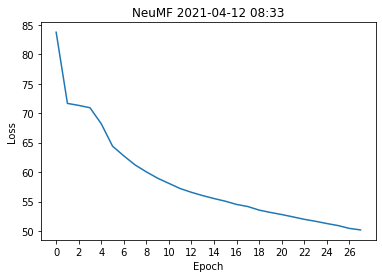

12 Apr 08:33    INFO  Loading model structure and parameters from saved/NeuMF-Apr-12-2021_08-32-23.pth
Evaluate   : 100%|██████████| 472/472 [00:00<00:00, 800.49it/s]
12 Apr 08:33    INFO  best valid result: {'recall@10': 0.2079, 'mrr@10': 0.378, 'ndcg@10': 0.2228, 'hit@10': 0.7359, 'precision@10': 0.1517}
12 Apr 08:33    INFO  test result: {'recall@10': 0.2326, 'mrr@10': 0.446, 'ndcg@10': 0.2702, 'hit@10': 0.7593, 'precision@10': 0.1844}


<Figure size 432x288 with 0 Axes>

In [ ]:
from logging import getLogger
from recbole.utils import init_logger, init_seed
from recbole.trainer import Trainer
from recbole.config import Config
from recbole.data import create_dataset, data_preparation


if __name__ == '__main__':
    config = Config(model=NeuMF, dataset='ml-100k', config_dict=config_dict_neumf)
    init_seed(config['seed'], config['reproducibility'])

    # logger initialization
    init_logger(config)
    logger = getLogger()

    logger.info(config)

    # dataset filtering
    dataset = create_dataset(config)
    logger.info(dataset)

    # dataset splitting
    train_data, valid_data, test_data = data_preparation(config, dataset)

    # model loading and initialization
    model = NeuMF(config, train_data).to(config['device'])
    logger.info(model)

    # trainer loading and initialization
    trainer = Trainer(config, model)

    # model training
    best_valid_score, best_valid_result = trainer.fit(train_data, valid_data, show_progress=True)
    
    # trainer.save(model, config['mf_pretrain'])

    # model evaluation
    test_result = trainer.evaluate(test_data, show_progress=True)

    logger.info('best valid result: {}'.format(best_valid_result))
    logger.info('test result: {}'.format(test_result))

In [ ]:
test_result

{'hit@10': 0.8049,
 'mrr@10': 0.4867,
 'ndcg@10': 0.2891,
 'precision@10': 0.1963,
 'recall@10': 0.254}

In [ ]:
model

NeuMF(
  (user_mf_embedding): Embedding(944, 64)
  (item_mf_embedding): Embedding(1683, 64)
  (user_mlp_embedding): Embedding(944, 64)
  (item_mlp_embedding): Embedding(1683, 64)
  (mlp_layers): MLPLayers(
    (mlp_layers): Sequential(
      (0): Dropout(p=0.1, inplace=False)
      (1): Linear(in_features=128, out_features=128, bias=True)
      (2): ReLU()
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=128, out_features=64, bias=True)
      (5): ReLU()
    )
  )
  (predict_layer): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (loss): BCELoss()
)

In [ ]:
import torch
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.utils import get_model, init_seed
from recbole.utils.case_study import full_sort_topk, full_sort_scores


if __name__ == '__main__':
    # this part is to load saved model.
    # config_dict = {
    #     # here you can set some parameters such as `gpu_id` and so on.
    # }
    config = Config(model=NeuMF, dataset='ml-100k', config_dict=config_dict_neumf)
    init_seed(config['seed'], config['reproducibility'])
    dataset = create_dataset(config)
    train_data, valid_data, test_data = data_preparation(config, dataset)
    # Here you can also use `load_split_dataloaders` to load data.
    # The example code for `load_split_dataloaders` can be found in `save_and_load_example.py`.

    # model = get_model(config['model'])(config, train_data)
    model = NeuMF(config, train_data)
    checkpoint = torch.load('/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/saved/NeuMF-Apr-12-2021_08-32-23.pth')  # Here you can replace it by your model path.
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()

    # uid_series = np.array([1, 2])  # internal user id series
    # or you can use dataset.token2id to transfer external user token to internal user id
    uid_series = dataset.token2id(dataset.uid_field, ['200'])
    print("user_id: ", uid_series)

    topk_score, topk_iid_list = full_sort_topk(uid_series, model, test_data, k=10)
    print("Top k scores: ", topk_score)  # scores of top 10 items
    print("Top 10 items id: ", topk_iid_list)  # internal id of top 10 items
    external_item_list = dataset.id2token(dataset.iid_field, topk_iid_list)
    print("External tokens of top 10 items: ", external_item_list)  # external tokens of top 10 items
    print()

    score = full_sort_scores(uid_series, model, test_data)
    print("Score of all items: ", score)  # score of all items
    print("Score of item 242, 302 for user 13: ", score[0, dataset.token2id(dataset.iid_field, ['242', '302'])])  # score of item ['242', '302'] for user '13'.

12 Apr 08:45    INFO  Build [GeneralNegSampleDataLoader] for [train] with format [InputType.POINTWISE]
12 Apr 08:45    INFO  [train] Negative Sampling: {'strategy': 'by', 'by': 4, 'distribution': 'uniform'}
12 Apr 08:45    INFO  [train] batch_size = [2048], shuffle = [True]

12 Apr 08:45    INFO  Build [GeneralFullDataLoader] for [evaluation] with format [InputType.POINTWISE]
12 Apr 08:45    INFO  Evaluation Setting:
	Group by user_id
	Ordering: {'strategy': 'shuffle'}
	Splitting: {'strategy': 'by_ratio', 'ratios': [0.8, 0.1, 0.1]}
	Negative Sampling: {'strategy': 'full', 'distribution': 'uniform'}
12 Apr 08:45    INFO  [evaluation] batch_size = [4096], shuffle = [False]



user_id:  [13]
Top k scores:  tensor([[0.9273, 0.8981, 0.8699, 0.8686, 0.8436, 0.8313, 0.8255, 0.8232, 0.8128,
         0.8046]])
Top 10 items id:  tensor([[248,  53, 157,  23, 368, 477,  83, 321, 308,  50]])
External tokens of top 10 items:  [['204' '181' '79' '144' '168' '566' '403' '97' '186' '100']]

Score of all items:  tensor([[      -inf, 4.3610e-03, 9.6714e-02,  ..., 1.2924e-08, 1.0005e-08,
         5.2368e-07]])
Score of item 242, 302 for user 13:  tensor([0.0044, 0.0967])


In [ ]:
print("Score of item 242, 302 for user 196: ", score[0, dataset.token2id(dataset.iid_field, ['181', '79'])])  # score of item ['242', '302'] for user '196'.

Score of item 242, 302 for user 196:  tensor([0.9619, 0.9473])


In [ ]:
checkpoint_file = trainer.saved_model_file

In [ ]:
checkpoint_file

'saved/NeuMFCNN-Apr-12-2021_03-09-40.pth'

In [ ]:
checkpoint = torch.load(checkpoint_file)


In [ ]:
checkpoint['state_dict']

OrderedDict([('user_mf_embedding.weight',
              tensor([[-1.1127e-02,  2.3240e-04, -1.1726e-02,  ...,  6.4797e-03,
                       -9.6722e-03, -4.7109e-03],
                      [-7.4375e-02, -1.1224e-01, -3.5270e-02,  ..., -1.4489e-01,
                        1.6135e-03,  1.0975e-02],
                      [-1.5341e-01, -3.3926e-02, -1.9465e-01,  ...,  4.5000e-01,
                        1.7899e-01,  1.7424e-01],
                      ...,
                      [-2.5264e-01,  8.0540e-03, -1.0162e-01,  ...,  2.2529e-01,
                       -9.1338e-02,  3.1968e-02],
                      [ 2.1276e-01, -1.8564e-01, -3.0214e-01,  ...,  1.0278e-01,
                        2.6727e-01,  3.0747e-01],
                      [-2.9109e-01, -2.8147e-02, -1.9868e-01,  ...,  3.6817e-01,
                        3.1153e-02,  8.0802e-02]], device='cuda:0')),
             ('item_mf_embedding.weight',
              tensor([[ 0.0057,  0.0015, -0.0043,  ..., -0.0089, -0.0059, -0.0024],

In [ ]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
model.eval()

NeuMFCNN(
  (user_mf_embedding): Embedding(944, 64)
  (item_mf_embedding): Embedding(1683, 64)
  (user_cnn_embedding): Embedding(944, 64)
  (item_cnn_embedding): Embedding(1683, 64)
  (cnn_layers): CNNLayers(
    (cnn_layers): Sequential(
      (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(4, 4), stride=(4, 4))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
      (5): ReLU()
      (6): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
      (7): ReLU()
    )
  )
  (predict_layer): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (loss): BCELoss()
)

In [ ]:
from tqdm import tqdm

In [ ]:
iter_data = enumerate(test_data)

In [ ]:
trainer.device

device(type='cuda')

In [ ]:
test_data.dl_type

<DataLoaderType.FULL: 2>

In [ ]:
for batch_idx, batched_data in iter_data:
  interaction = batched_data
  batch_size = interaction.length
  if batch_size <= trainer.test_batch_size:
      print(interaction.to(trainer.device))
      scores = trainer.model.predict(interaction.to(trainer.device))
      print(scores)
  else:
      print(interaction)
      scores = trainer._spilt_predict(interaction, batch_size)
      print(scores)

AttributeError: ignored

In [ ]:
train_data.inter_matrix().toarray().shape

(944, 1683)

In [ ]:
train_data.dataset

ml-100k
The number of users: 944
Average actions of users: 85.69247083775186
The number of items: 1683
Average actions of items: 48.826586102719034
The number of inters: 80808
The sparsity of the dataset: 94.91374361763195%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'label']

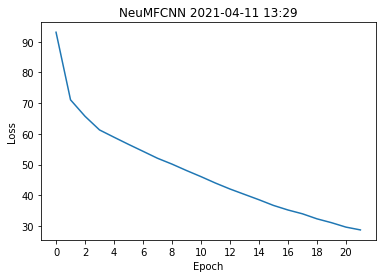

In [ ]:
trainer.plot_train_loss()

In [ ]:
dataset._history_matrix(2)

11 Apr 13:09    WARNING  Max value of 2's history interaction records has reached 61.75847457627118% of the total.


(tensor([[  0,   0,   0,  ...,   0,   0,   0],
         [758, 355, 524,  ...,   0,   0,   0],
         [ 48, 808, 547,  ...,   0,   0,   0],
         ...,
         [651,   0,   0,  ...,   0,   0,   0],
         [651,   0,   0,  ...,   0,   0,   0],
         [651,   0,   0,  ...,   0,   0,   0]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([  0, 117, 297,  ...,   1,   1,   1]))

In [ ]:
train_data.inter_matrix().toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
trainer.model

NeuMFCNN(
  (user_mf_embedding): Embedding(944, 64)
  (item_mf_embedding): Embedding(1683, 64)
  (user_cnn_embedding): Embedding(944, 64)
  (item_cnn_embedding): Embedding(1683, 64)
  (cnn_layers): CNNLayers(
    (cnn_layers): Sequential(
      (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(4, 4), stride=(4, 4))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
      (5): ReLU()
      (6): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
      (7): ReLU()
    )
  )
  (predict_layer): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (loss): BCELoss()
)

In [ ]:
trainer.

In [ ]:
GMF = torch.load('/content/gdrive/MyDrive/CS6101 Project Group/Experiments with RecBole/saved/GMF-4neg.pth')

In [ ]:
GMF['state_dict']

OrderedDict([('user_mf_embedding.weight',
              tensor([[ 0.0083, -0.0108, -0.0077,  ...,  0.0008, -0.0040, -0.0151],
                      [ 0.1141,  0.0873,  0.4129,  ..., -0.0407,  0.0087, -0.0908],
                      [-0.3806, -0.6091, -0.1351,  ..., -0.2200,  0.2516,  0.2418],
                      ...,
                      [-0.0323, -0.0958, -0.0350,  ..., -0.1409,  0.1383,  0.0996],
                      [ 0.0936, -0.4131, -0.0379,  ..., -0.2960,  0.0126,  0.4657],
                      [ 0.1245, -0.4062, -0.4669,  ..., -0.2475,  0.2053,  0.2945]],
                     device='cuda:0')),
             ('item_mf_embedding.weight',
              tensor([[-0.0031, -0.0138,  0.0115,  ...,  0.0078, -0.0070,  0.0158],
                      [ 0.4582,  0.3885,  0.5231,  ...,  0.0038, -0.0918, -0.0859],
                      [ 0.3439, -0.0950,  0.5880,  ..., -0.0872, -0.0703, -0.1215],
                      ...,
                      [ 0.8361,  0.9204,  0.5596,  ...,  0.7893, 

In [ ]:
trainer.evaluate(test_data)

23 Mar 18:11    INFO  Loading model structure and parameters from saved/NeuMFCNN-Mar-23-2021_18-07-14.pth


{'hit@10': 0.7773,
 'mrr@10': 0.4578,
 'ndcg@10': 0.2724,
 'precision@10': 0.1885,
 'recall@10': 0.2371}